<a href="https://colab.research.google.com/github/mgomez270/MLGuia1/blob/main/Calidad_del_vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**“Proyecto 1 "Predecir la calidad del Vino”**



**Nombres de los integrantes del grupo:**



*   CRISTIAN FELIPE BARBOSA TUNJANO
*   DAVID BORRERO DIAZ MICHAEL
*   ALEJANDRO GOMEZ RAMIREZ
*   NICOLAS SUAREZ


**Una explicación breve del problema teniendo en cuenta lo siguiente:**

El dataset incluye mediciones como acidez, contenido de azúcar, y niveles de alcohol, y nos propone determinar cómo estas características influyen en la percepción de calidad. Al cargar los datos y realizar un análisis exploratorio inicial, identificaremos las características numéricas y cualitativas del dataset y nos proporcionara estadísticas descriptivas para entender mejor las tendencias y distribuciones en los datos. Este análisis preliminar te ayudará a plantear hipótesis y posibles direcciones para modelar y predecir la calidad del vino.

##Analisis exploratorio

In [1143]:
#importamos librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from matplotlib import pyplot as plt

In [1144]:
#traemos la data
df = pd.read_csv('/content/winequality-red.csv', delimiter=';')


In [1145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Vemos que no hay Datos nulos y todos los tipos de datos tienen sentido

In [1146]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Vemos que la desviación estandar es muy alta para 'total sulfur dioxide' y otras columnas.
No conocemos mucho del tema asi que no sabemos que otros datos estan atipicos

hacemos un mapa de correlación para elegir las VARIABLES PREDICTORIAS

<Axes: >

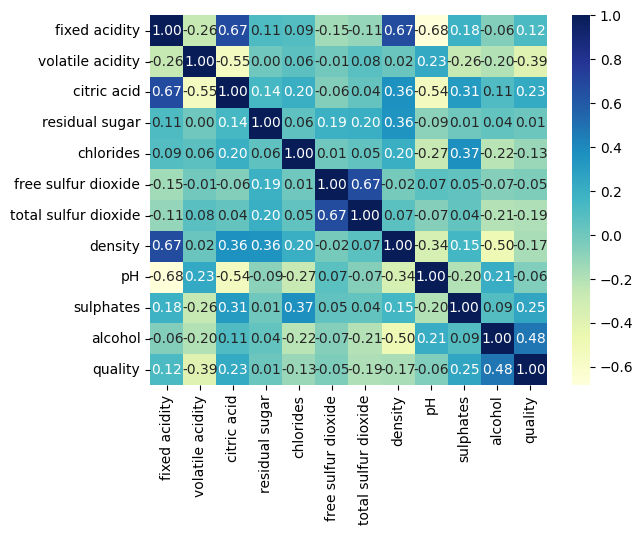

In [1147]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),annot=True,fmt=".2f",cmap="YlGnBu")

vemos que hay varios campos que tienen una correlación significativa con la varibale objetivo calidad creamos un nuevo df a continuación solo con ellos. y no hacer cambios a variables que no son relevantes

<Axes: xlabel='quality', ylabel='Count'>

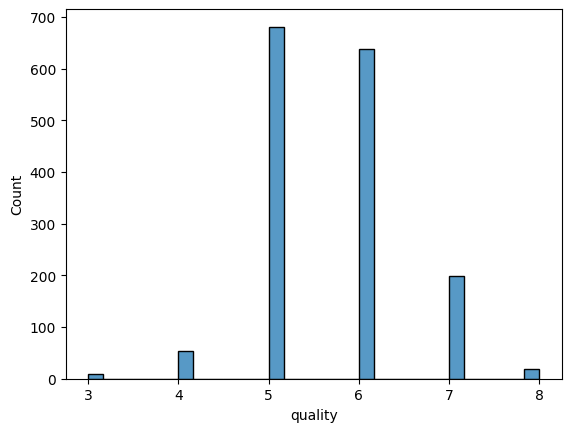

In [1148]:
#revisamos la distribución de la variable objetivo
sns.histplot(df['quality'])

In [1149]:
nuevo_df=df

##Estandarización de datos

<Axes: >

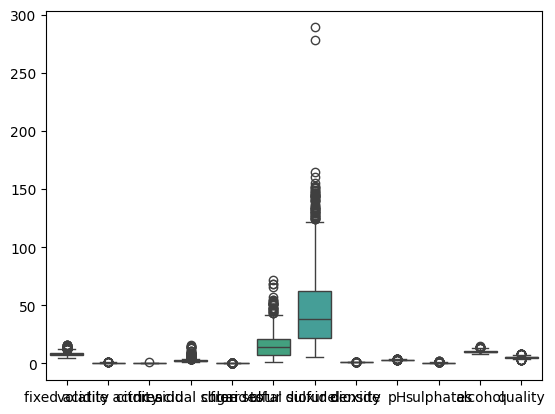

In [1150]:
sns.boxplot(data=nuevo_df)

In [1151]:
#estandarizamos
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("scaler", StandardScaler())])

In [1152]:
X_train = preprocessor.fit_transform(nuevo_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
X_train = pd.DataFrame(X_train,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
X_train['quality']=nuevo_df['quality']

In [1153]:
def replace_outliers_with_mean(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    col_mean = df_in[col_name].mean()

    df_in.loc[df_in[col_name] < fence_low, col_name] = col_mean
    df_in.loc[df_in[col_name] > fence_high, col_name] = col_mean

    return df_in

In [1154]:
for col in [column for column in X_train.columns if column != 'quality']:
    nuevo_df_clean = replace_outliers_with_mean(nuevo_df, col)

In [1155]:
#creamos una copia de Xtrain con datos limpios para luego usarla en la regresión logistica
X_train2=X_train.copy()

<Axes: >

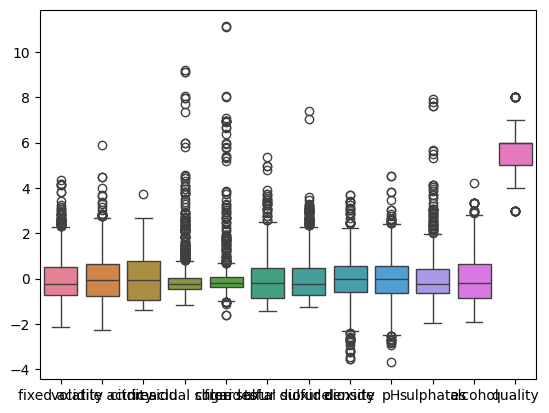

In [1156]:
sns.boxplot(data=X_train)

In [1157]:
X=X_train.drop('quality',axis=1)
y=X_train[['quality']]

##separamos conjuntos

In [1158]:
#separación de los conjuntos del df
from sklearn.model_selection import train_test_split

X_train, x_test, y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=123)

In [1159]:
#comprovamos el tamaño de los conjuntos
print('tamaño original',df.shape)
print('Entrenamiento',X_train.shape,y_train.shape)
print('Prueba',x_test.shape,y_test.shape)


tamaño original (1599, 12)
Entrenamiento (1279, 11) (1279, 1)
Prueba (320, 11) (320, 1)


##Entrenamos Regresion Lineal

In [1160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1161]:
model_result=LinearRegression()
model_result.fit(X_train,y_train)

LinearRegression()

In [1162]:
model_result.score(x_test,y_test)

0.34359614542907213

In [1163]:
mean_squared_error(y_test,model_result.predict(x_test))

0.43588677448211444

Hay un valor muy bajo de score :'( y error medio

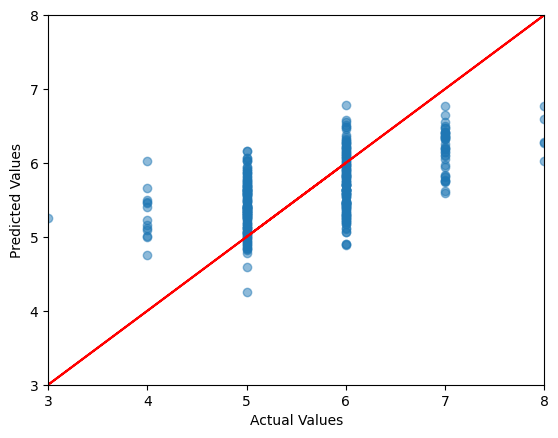

In [1164]:
import matplotlib.pyplot as plt
plt.scatter(y_test, model_result.predict(x_test),alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(3,8)
plt.ylim(3,8)
plt.show()

#Reentrenamiento del modelo

In [1165]:
model_result.score(X_train,y_train)

0.36238845359171856

El resultado con los datos propios de entrenamiento no cambia mucho respecto a el resultado con los datos de test.

Es de asumirse que **no hay overfitting**. Sin embargo la haremos por si acaso

In [1166]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=100, max_iter=10)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=100, max_iter=10)

In [1167]:
lasso_reg.score(x_test,y_test)

-0.0006884489672018823

No sabemos interpretar el resultado. La mejor manera para tratar este ejercicio es por medio de regresión logistica

#Regresión Logistica

In [1168]:
y_train['quality'].unique()

array([6, 5, 7, 4, 3, 8])

In [1173]:
X_train2['category'] = ['good' if quality >=6 else 'bad' for quality in X_train2['quality']]

In [1177]:
X_train2.shape

(1599, 13)

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error:', mse)
print('R2 score:', r2)


Tras evaluar los modelos de regularización implementados —Ridge Regression, Lasso Regression y Stochastic Gradient Descent (SGD)—, se observa que no ofrecen una mejora sobre el desempeño del modelo de regresión lineal inicial. Específicamente, los modelos Ridge y Lasso presentan un rendimiento inferior, evidenciado por el incremento en el Error Cuadrático Medio (MSE) y la reducción en el coeficiente de determinación (R²). Además, el modelo SGD resulta completamente inapropiado para el conjunto de datos actual, probablemente debido a problemas en la convergencia o la selección de parámetros. En vista de estos resultados, se recomienda mantener el uso del modelo de regresión lineal original. No obstante, sería prudente explorar otras estrategias para optimizar su rendimiento, tales como la revisión de las variables utilizadas, la aplicación de transformaciones a los datos, o la experimentación con diferentes tipos de modelos que puedan adaptarse mejor a las características inherentes del conjunto de datos.

In [ ]:

import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)

params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.3,
    'max_depth': 5,
    'alpha': 10
}

model = xgb.train(params=params, dtrain=dtrain, num_boost_round=50)

dtest = xgb.DMatrix(data=X_test)
y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R2 score:', r2)


La implementación del modelo XGBoost ha demostrado ser superior en términos de precisión y capacidad explicativa en comparación con el modelo inicial de regresión lineal y los modelos de regularización evaluados previamente. Específicamente, el Error Cuadrático Medio (MSE) se redujo a 0.3909669730358456 desde 0.4242, indicando una mayor exactitud en las predicciones realizadas por el modelo. Además, el coeficiente de determinación (R²) mejoró significativamente, aumentando de 0.3413 a 0.39288485882861046. Esto revela que el modelo XGBoost es capaz de explicar aproximadamente el 39.3% de la variabilidad de la variable dependiente, superando el 34.1% alcanzado por el modelo de regresión lineal.

Estos resultados resaltan la eficacia de XGBoost para manejar complejidades en los datos que los modelos lineales y de regularización no logran capturar. Dado su desempeño superior, se recomienda la adopción de XGBoost para análisis futuros dentro de este ámbito de estudio, especialmente en situaciones donde la interacción entre variables y la no linealidad juegan roles críticos en la predicción de resultados.

#Regresion Logistica

  7. Asumiremos que si quality es mayor o igual a 6 entonces el vino es bueno, en otro caso diremos que tiene calidad regular. Haga una variable nueva con esta condición y llámela categorical_quality. Esta nueva variable será la variable objetivo de nuestra regresión logística.

In [ ]:
df.to_csv('/content/winequality-red-with-categories.csv', index=False)


In [ ]:
from sklearn.linear_model import LogisticRegression

X = df.drop(['quality', 'quality_category'], axis=1)
y = df['quality_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)
print('Classification report:')
print(classification_report)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Number of training samples:', X_train.shape[0])
print('Number of testing samples:', X_test.shape[0])


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)
print('Classification report:')
print(classification_report)


**Análisis Comparativo:**

Ambas regresiones logísticas muestran resultados muy similares en términos de precisión (0.78) y en la matriz de confusión. La precisión, el recall y el f1-score también son similares entre las dos regresiones para ambas clases ("bad" y "good"). Esto sugiere que el rendimiento del modelo no se ve afectado significativamente por el cambio en el tamaño del conjunto de entrenamiento.

En resumen, ambas regresiones logísticas proporcionan resultados consistentes y confiables, independientemente de si se entrenaron con el 100% o el 80% de los datos. Esto sugiere que el modelo es robusto y generaliza bien a diferentes conjuntos de datos de entrenamiento.

# conclusiones entre xgboost y regresion logistica

Comparando los resultados de los dos modelos, observamos que el modelo XGBoost tiene un MSE ligeramente más bajo que el modelo de regresión lineal: 0.391 para XGBoost frente a 0.424 para la regresión lineal. Esto indica que las predicciones del modelo XGBoost están más cerca de los valores reales en promedio.

Además, el coeficiente de determinación (R^2) para el modelo XGBoost es aproximadamente 0.393, mientras que para el modelo de regresión lineal es aproximadamente 0.341. Esto sugiere que el modelo XGBoost explica alrededor del 39.28% de la variabilidad en la variable objetivo, mientras que el modelo de regresión lineal explica alrededor del 34.13%. Por lo tanto, el modelo XGBoost tiene un mejor ajuste a los datos en términos de R^2.

En resumen, basándonos en el MSE y el R^2, podemos concluir que el modelo XGBoost tiene un rendimiento ligeramente mejor que el modelo de regresión lineal en este conjunto de datos.